<a href="https://colab.research.google.com/github/LauraGuio/MachineLearning/blob/master/P7_%C3%A1rbol_decisi%C3%B3n_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart failure prediction

##Cargar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier #clase de árboles de decisión 

##Cargar DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.DataFrame
df=pd.read_csv('/content/drive/My Drive/Deep learning/datasets_727551_1263738_heart_failure_clinical_records_dataset.csv', encoding='utf-8')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##Explorar datos

###Tamaño del DataSet

In [ ]:
df.shape

(299, 13)

###¿Existen valores nulos?

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

###Describir DataSet

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##Gráficas

Sobrevivientes por edad

Text(0.5, 1.0, 'Sobrevivientes por Edad')

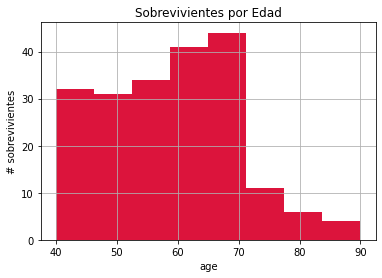

In [ ]:
Sur_Age = df.age[df.DEATH_EVENT==0]
Sur_Age.plot(kind="hist", color="crimson",bins=8).grid(True)
plt.xlabel("age")
plt.ylabel("# sobrevivientes")
plt.title("Sobrevivientes por Edad")

Sobrevivientes por género

Text(0.5, 1.0, 'Sobrevivientes por género')

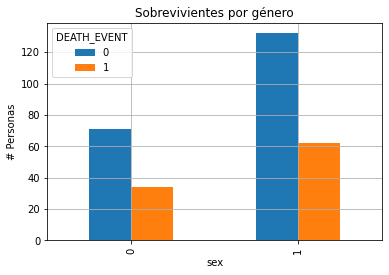

In [ ]:
gender_surv = pd.crosstab(df['sex'],df['DEATH_EVENT'])
gender_surv.plot.bar().grid(True)
plt.ylabel("# Personas")
plt.title("Sobrevivientes por género")

##Instanciar árbol de decisión

In [ ]:
#arbol = DecisionTreeClassifier()
arbol =DecisionTreeClassifier(max_depth=3, random_state=0)
#arbol =DecisionTreeClassifier(max_depth=6, random_state=0)

##Separamos datos para TRAIN y TEST

In [ ]:
X= df[["age","anaemia","high_blood_pressure","serum_creatinine","smoking","serum_sodium","sex","serum_creatinine","ejection_fraction","creatinine_phosphokinase"]]
Y= df["DEATH_EVENT"]
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##Predicciones

In [ ]:
from sklearn.metrics import accuracy_score
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.8200836820083682
Accuracy of test: %0.75
Accuracy Global %0.75


##Graficamos árbol

In [ ]:
classs_name_list= list(["Die","live"])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data= export_graphviz(arbol, feature_names=["age","anaemia","high_blood_pressure","serum_creatinine","smoking","serum_sodium","sex","serum_creatinine","ejection_fraction","creatinine_phosphokinase"],class_names=classs_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_heart_failure_v2.png")

True

##¿Optimizar árbol?

In [ ]:
df_importancia = pd.DataFrame({"característica": X_train.columns, "Importancia":arbol.feature_importances_})
df_importancia = df_importancia.sort_values("Importancia",ascending=False)
df_importancia.head()

,característica,Importancia
7,serum_creatinine,0.225798
9,creatinine_phosphokinase,0.219041
8,ejection_fraction,0.164423
0,age,0.156519
5,serum_sodium,0.120672


##Probar diferentes profundidades

In [ ]:
depth_list=list(range(1,10))
accuracy_list=[]
for depth in depth_list:
  arbol=DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(X_train,Y_train)
  score=arbol.score(X_test,Y_test)
  accuracy_list.append(score)

##Graficar resultado

<function matplotlib.pyplot.show>

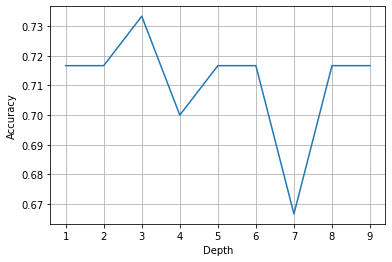

In [ ]:
plt.plot(depth_list,accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.grid(True)
plt.show